# Material Clustering Results
The clustering on the GPU server is finished, so we want to evaluate and visualise collected metric data for:
- elbow metric
- silhouette coefficient
- time each iteration took

# Elbow Metric

In [1]:
with open('../clustering/clusterings/1/elbow_metrics.txt') as elbow_metric_file:
    lines = [line.rstrip().split(':') for line in elbow_metric_file]
    cluster_numbers = [int(line[0]) for line in lines]
    elbow_metrics = [float(line[1]) for line in lines]
    
cluster_numbers, elbow_metrics

([2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  158,
  159,


In [2]:
from scripts.clustering_helper import draw_plot
draw_plot(cluster_numbers, elbow_metrics, "Elbow Metric")

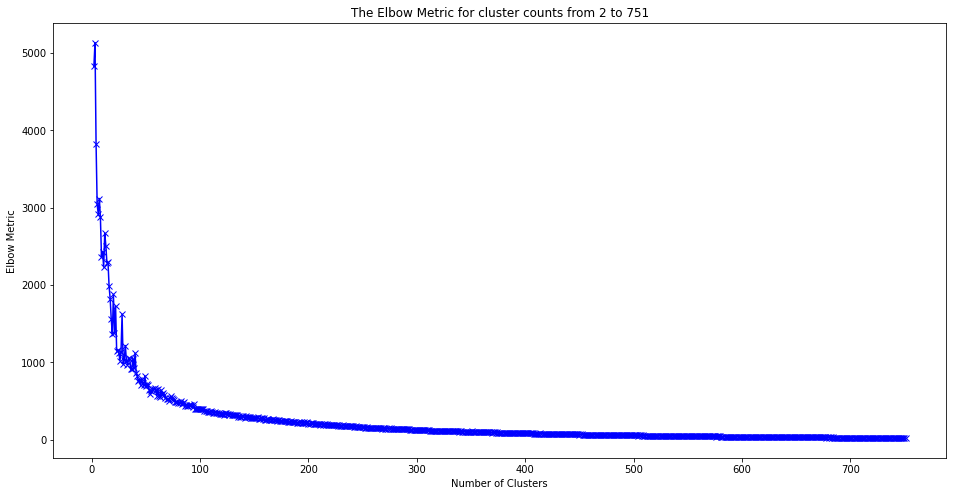

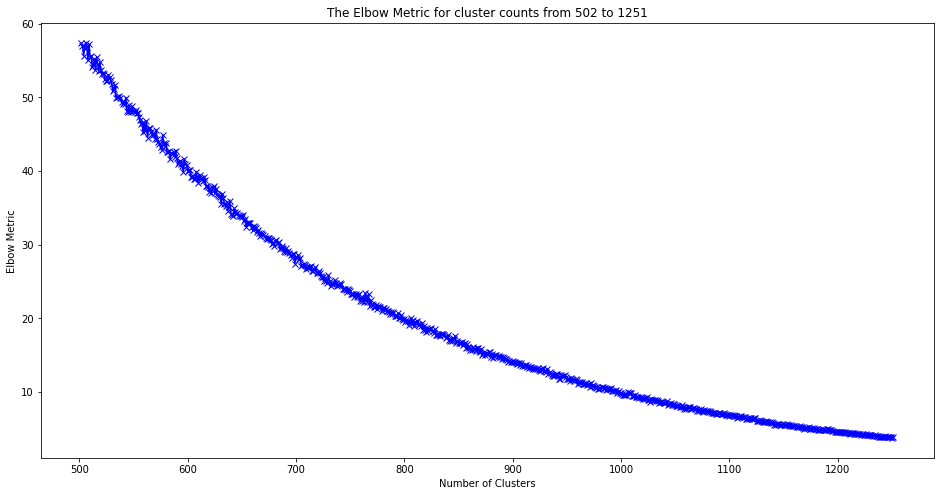

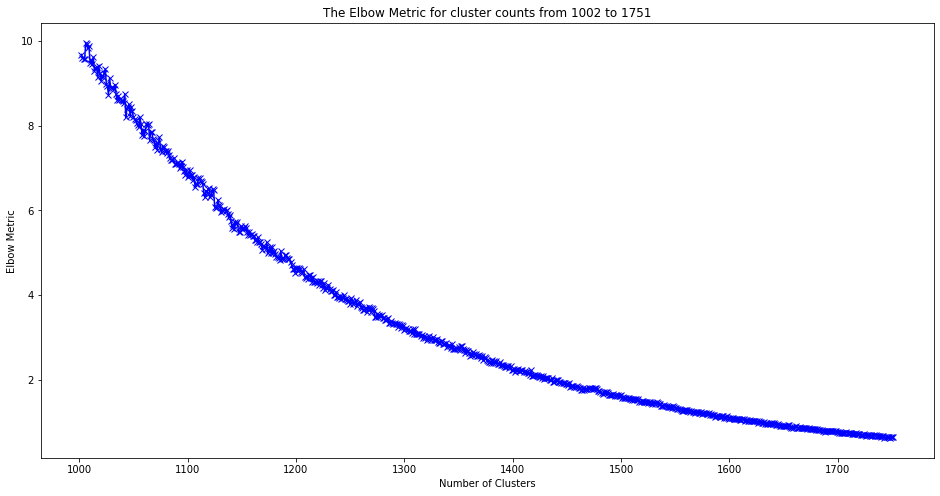

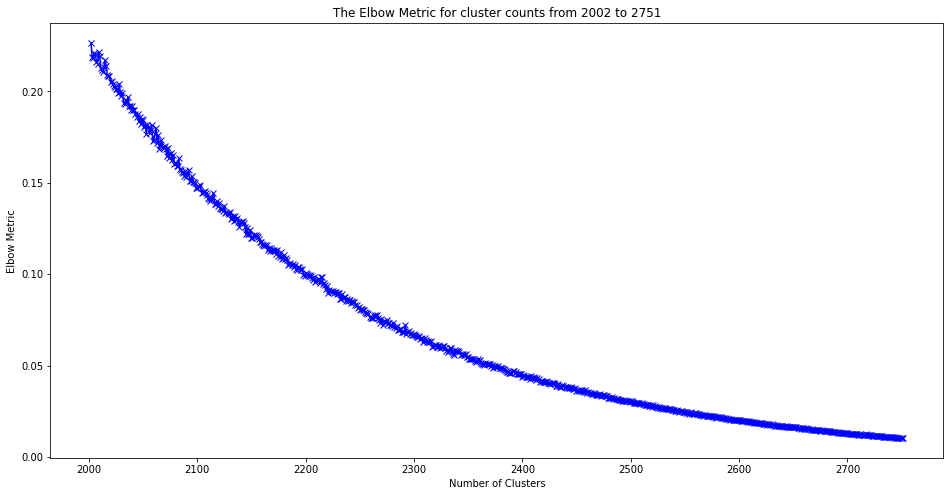

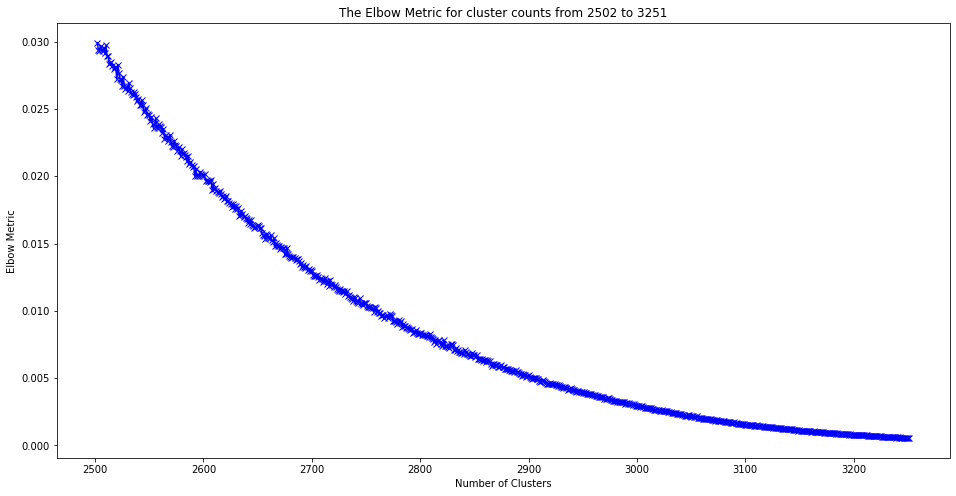

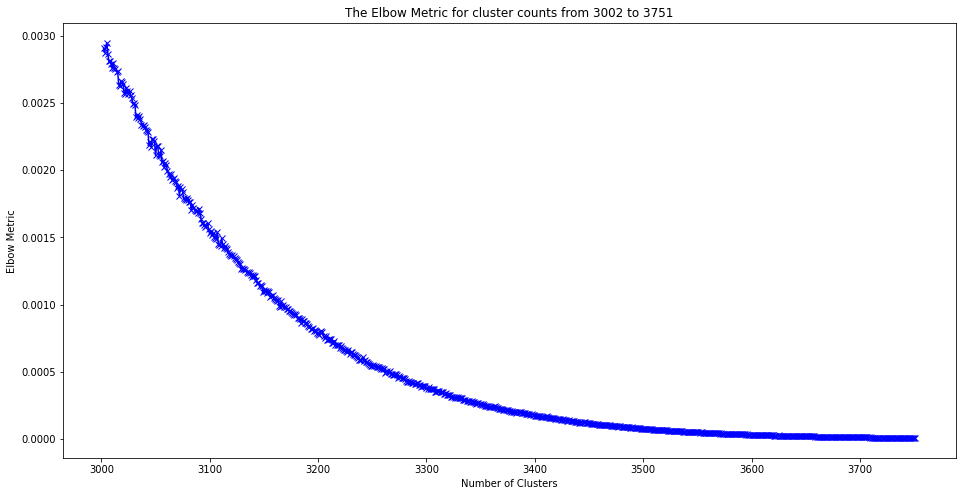

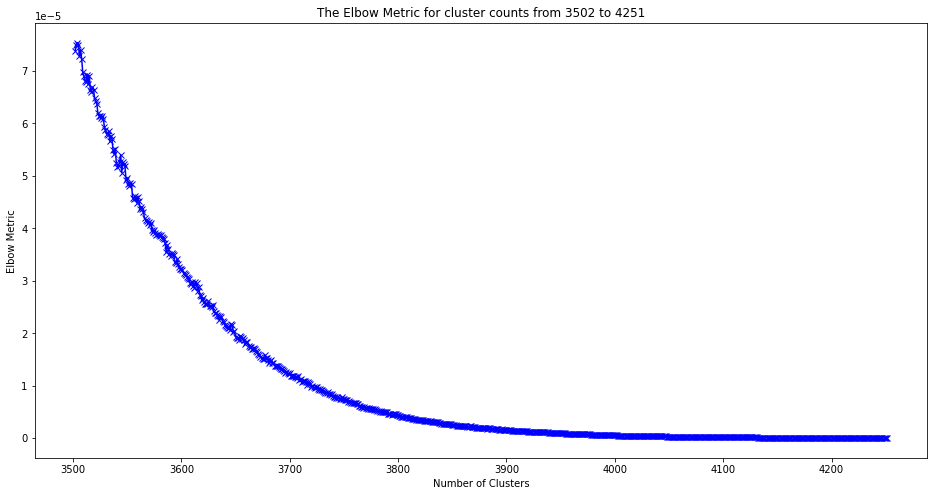

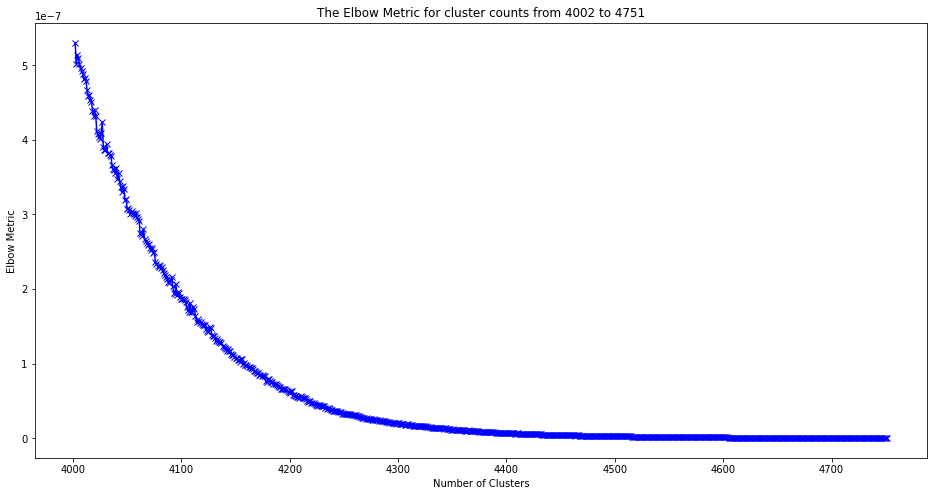

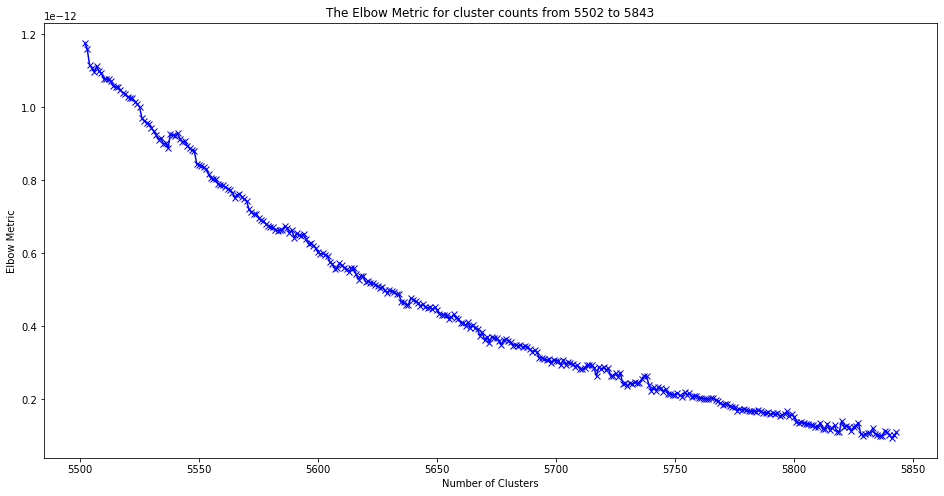

In [3]:
for i in range(0, len(cluster_numbers), 500):
    draw_plot(cluster_numbers[i:i+750], elbow_metrics[i:i+750], "Elbow Metric")

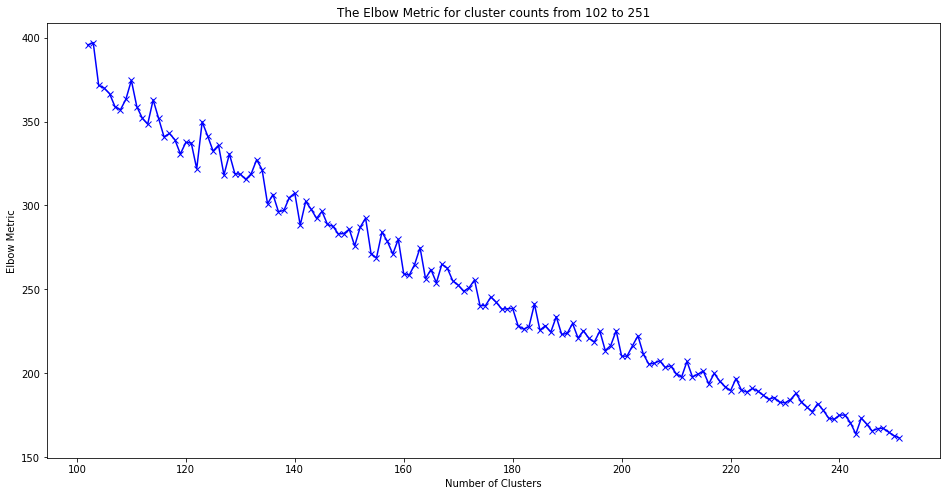

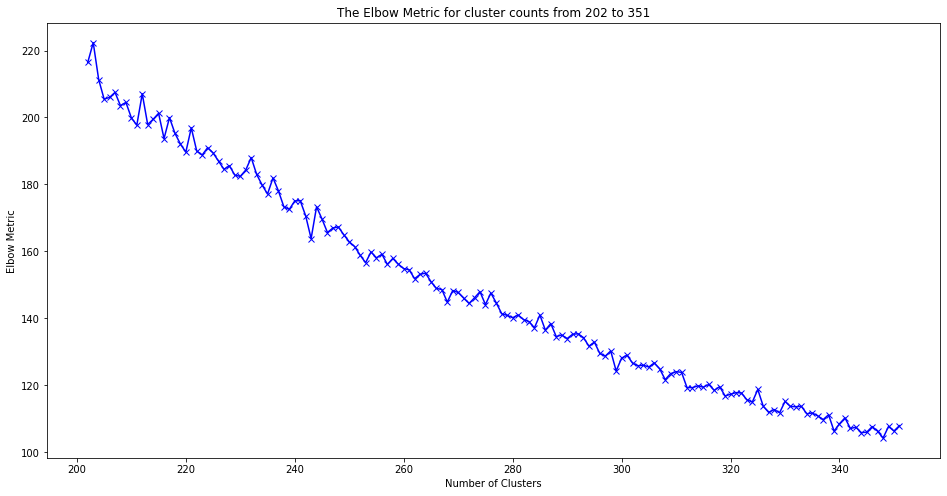

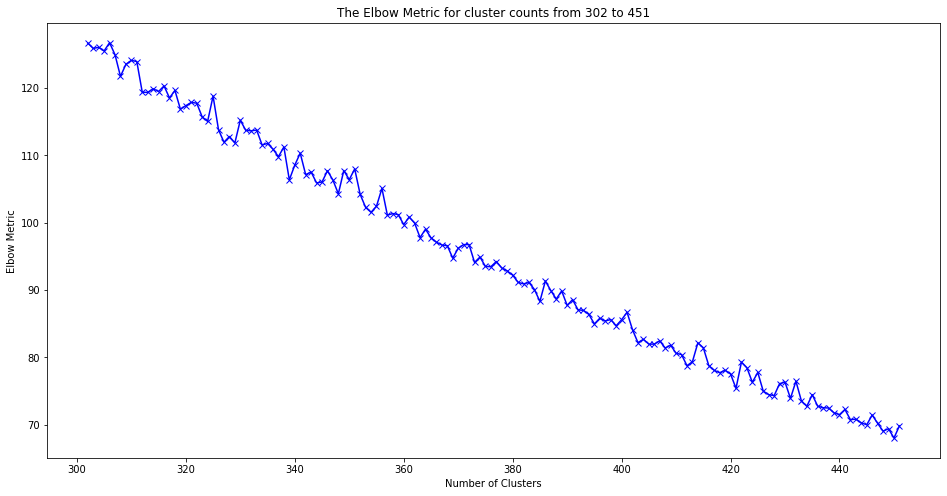

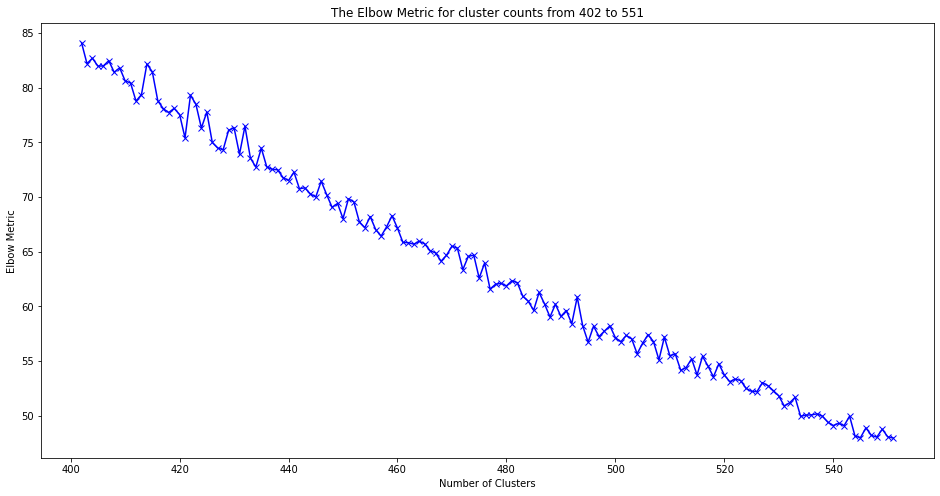

In [4]:
for i in range(0, 500, 100):
    draw_plot(cluster_numbers[i:i+150], elbow_metrics[i:i+150], "Elbow Metric")

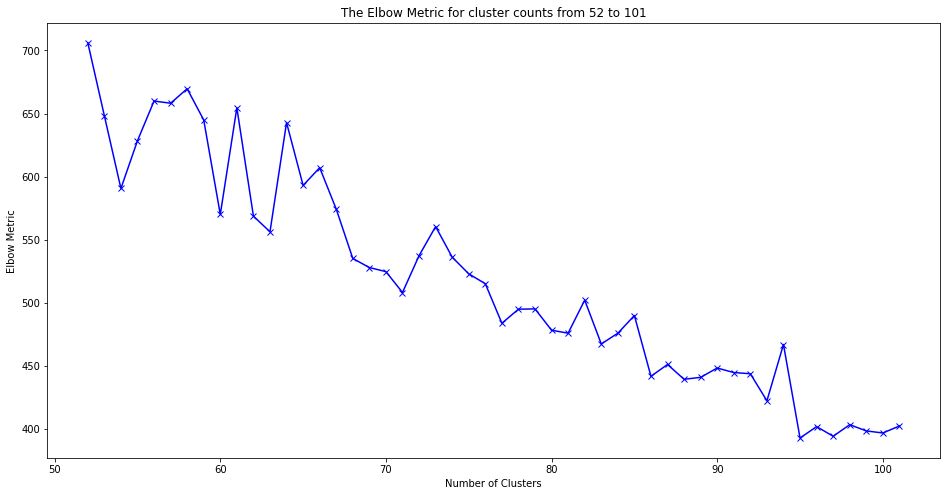

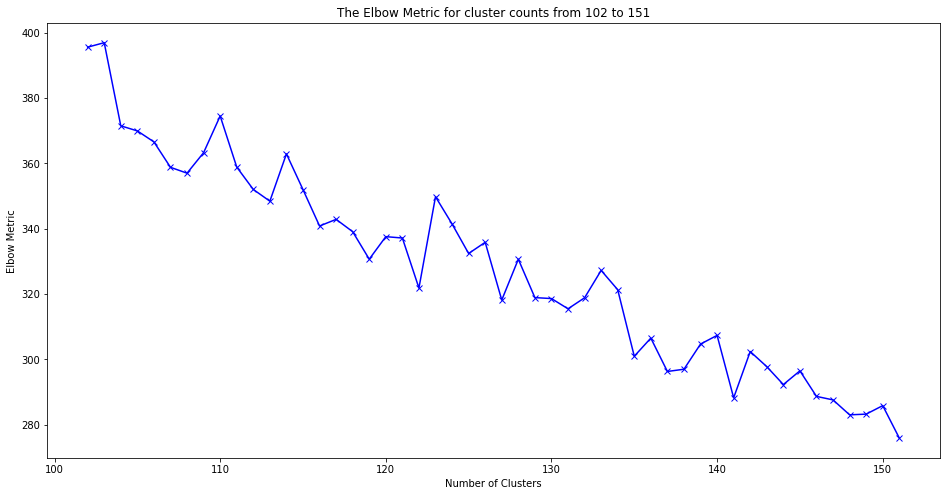

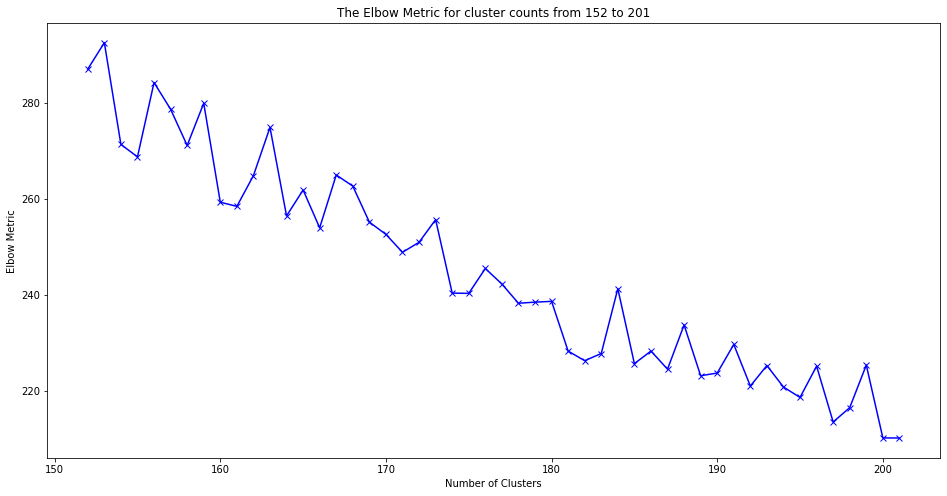

In [20]:
for i in range(0, 200, 50):
    draw_plot(cluster_numbers[i:i+50], elbow_metrics[i:i+50], "Elbow Metric")

# Silhouette Coefficient

In [6]:
with open('../clustering/clusterings/1/silhouette_metrics.txt') as silhouette_metric_file:
    lines = [line.rstrip().split(':') for line in silhouette_metric_file]
    cluster_numbers = [int(line[0]) for line in lines]
    silhouette_metrics = [float(line[1]) for line in lines]
    
cluster_numbers[:5], silhouette_metrics[:5]

([2, 3, 4, 5, 6],
 [0.1472161196508309,
  0.0038610026855337948,
  0.19061602230348615,
  0.37372527517531756,
  0.3232365994985665])

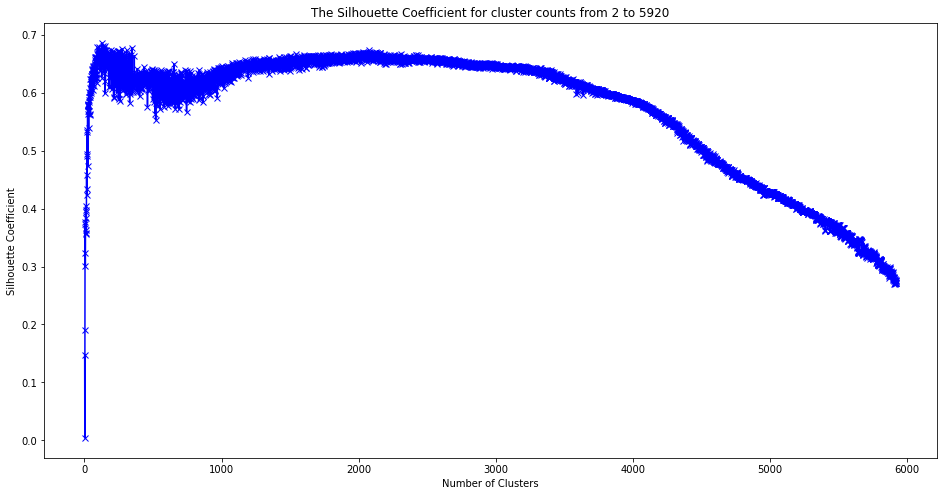

In [7]:
draw_plot(cluster_numbers, silhouette_metrics, "Silhouette Coefficient")

In [8]:
from statistics import mean, median
max(silhouette_metrics), min(silhouette_metrics), mean(silhouette_metrics), median(silhouette_metrics)

(0.686669698427406,
 0.0038610026855337948,
 0.5718853026657279,
 0.6227602698716175)

In [9]:
# Clustering with Max Silhouette Score
cluster_numbers[silhouette_metrics.index(max(silhouette_metrics))]

127

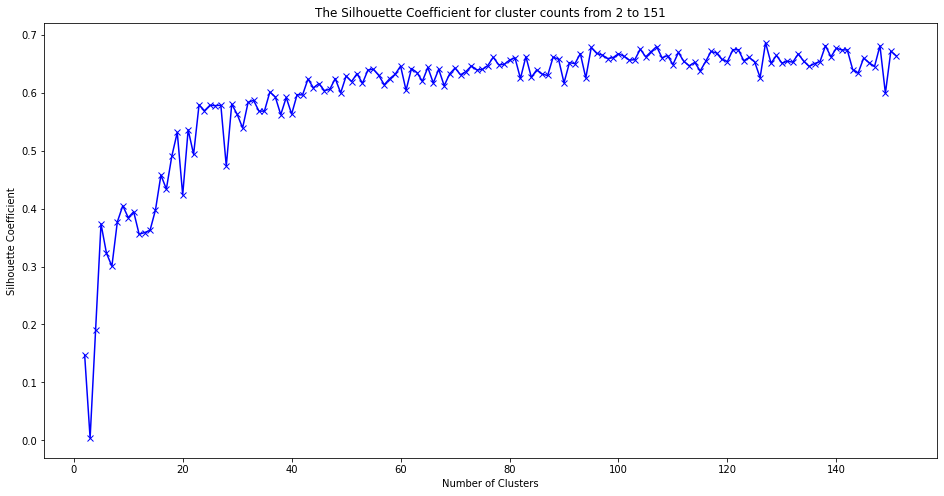

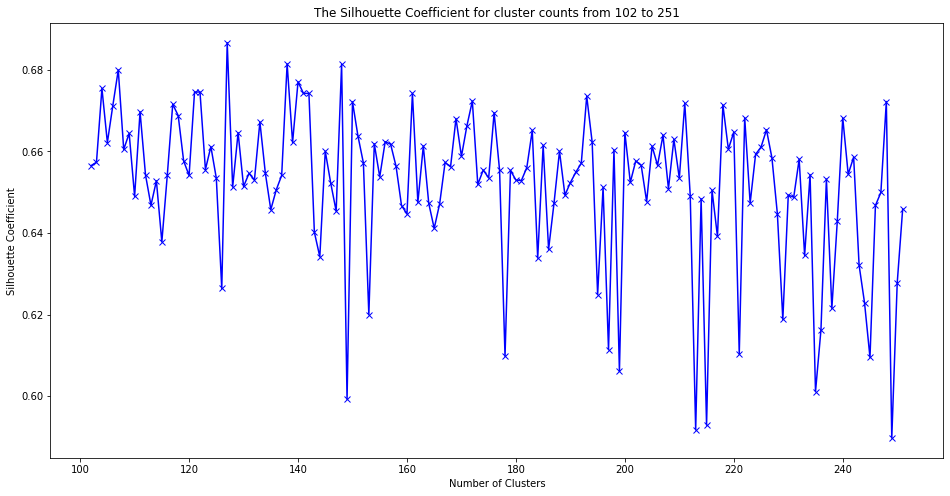

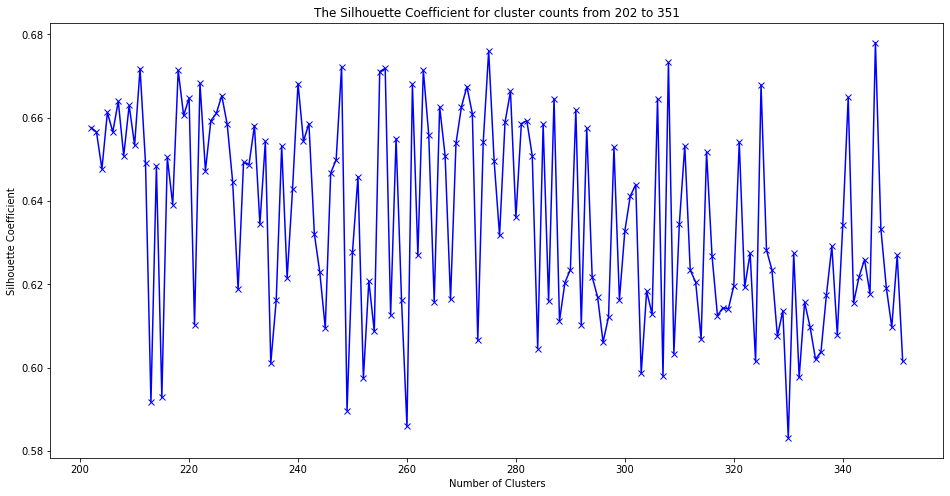

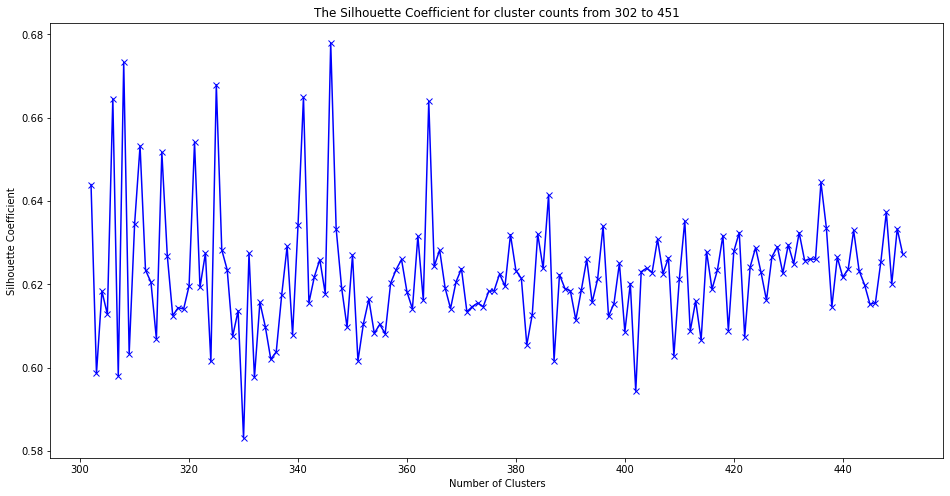

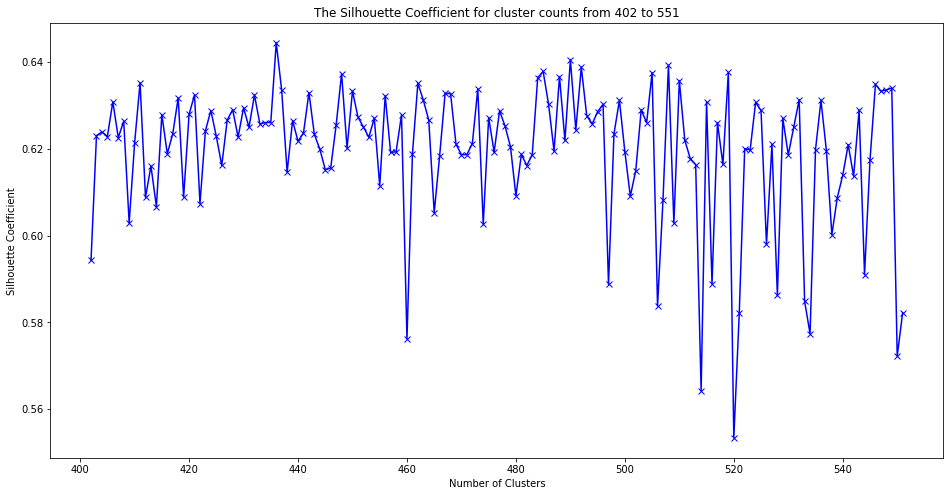

In [10]:
for i in range(0, 500, 100):
    draw_plot(cluster_numbers[i:i+150], silhouette_metrics[i:i+150], "Silhouette Coefficient")

# Time

In [11]:
with open('../clustering/clusterings/1/log.txt') as log_file:
    lines = [line.rstrip().split(':') for line in log_file]
    cluster_numbers = [int(line[0]) for line in lines]
    time_since_start = [float(line[1]) for line in lines]
    
cluster_numbers[:5], time_since_start[:5]

([2, 3, 4, 5, 6],
 [0.9967348575592041,
  1.8736200332641602,
  2.7666831016540527,
  3.6454405784606934,
  4.525481224060059])

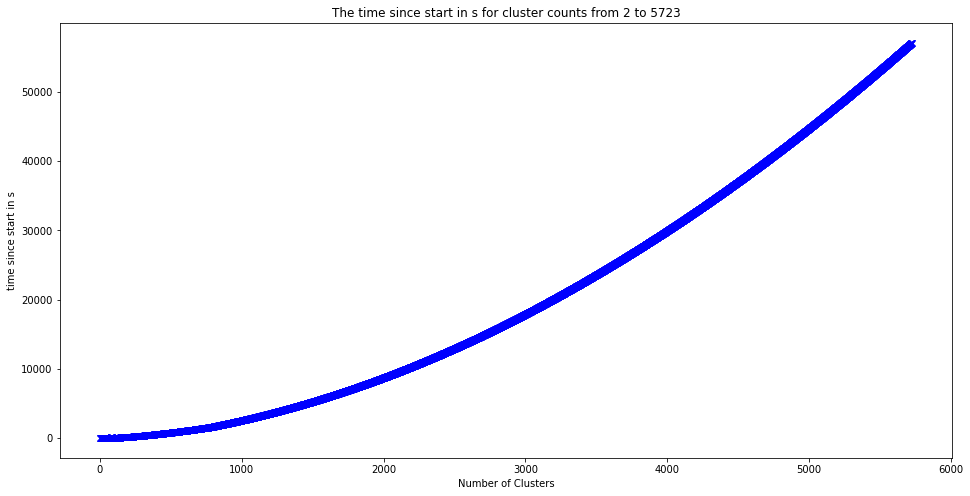

In [12]:
draw_plot(cluster_numbers, time_since_start, "time since start in s")

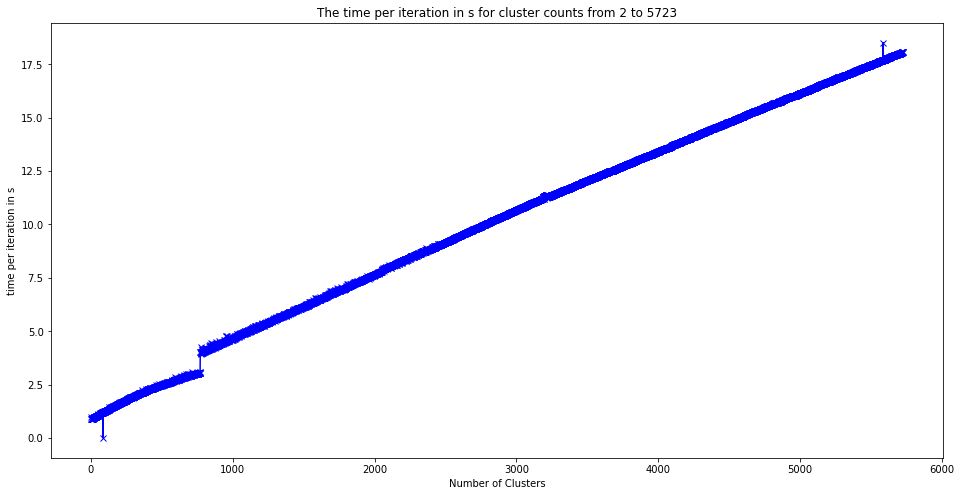

In [13]:
time_per_iteration = [0] * len(time_since_start)
time_per_iteration[0] = time_since_start[0]
for i in range(1, len(time_since_start)):
    time_per_iteration[i] = max(time_since_start[i] - time_since_start[i-1], 0)
draw_plot(cluster_numbers, time_per_iteration, "time per iteration in s")

In [14]:
max(time_per_iteration), min(time_per_iteration), mean(time_per_iteration), median(time_per_iteration)

(18.510333776474, 0, 9.995225395701308, 10.263943672180176)

With 10 seconds per iteration on average, we need 6.000 * 10s = 60.000s = 16,6 h for clustering up to 6.000 clusters.

In [15]:
max(time_per_iteration[0:3000]), min(time_per_iteration[0:3000]), mean(time_per_iteration[0:3000]), median(time_per_iteration[0:3000])

(10.666836261749268, 0, 5.994998547712962, 6.152659177780151)

With 6 seconds on average for the first 3.000 clusters, we get 3.000 * 6s = 18.000s = 5h for clustering the first 3.000 clusters. Looking at the silhouette coefficient, this should be sufficient.

In [16]:
draw_plot(cluster_numbers[0:100], time_per_iteration[0:100], "time per iteration in s")

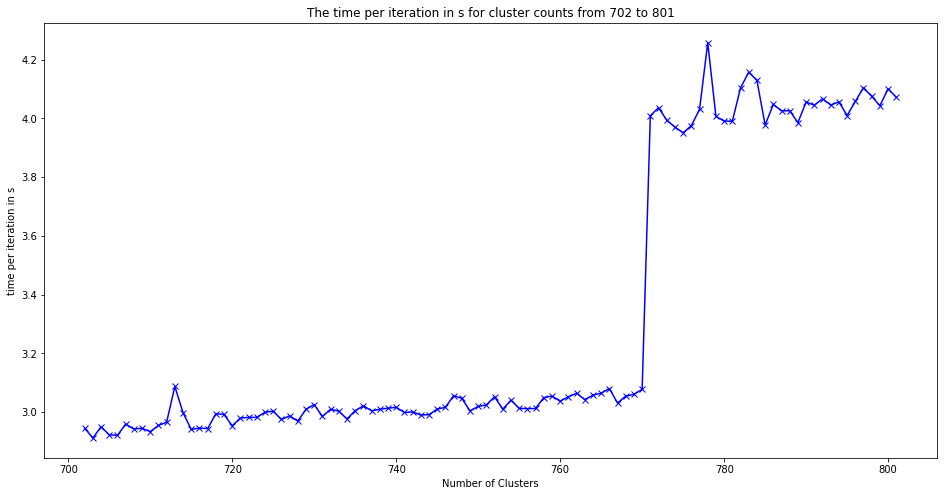

In [17]:
draw_plot(cluster_numbers[700:800], time_per_iteration[700:800], "time per iteration in s")

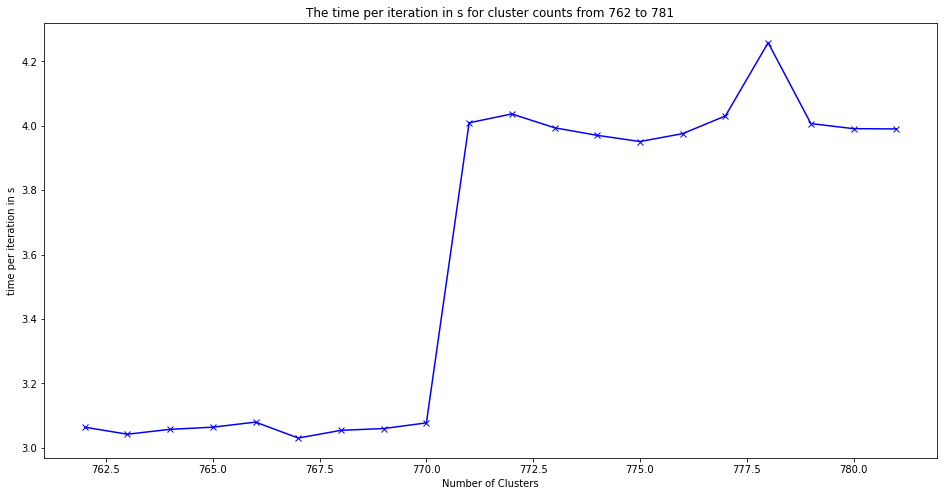

In [18]:
draw_plot(cluster_numbers[760:780], time_per_iteration[760:780], "time per iteration in s")

In [19]:
draw_plot(cluster_numbers[5580:5600], time_per_iteration[5580:5600], "time per iteration in s")